In [1]:
from hnxwidget import HypernetxWidget

In [3]:
HypernetxWidget(a=1, b=2)

HypernetxWidget(component='HypernetxWidget', props={'a': 1, 'b': 2})

In [5]:
import hypernetx as hnx

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

In [83]:
from hnxwidget.react_jupyter_widget import ReactJupyterWidget

from hypernetx.drawing.util import get_set_layering

class HypernetxWidget(ReactJupyterWidget):
    def __init__(self, H, **kwargs):
        # will break if already collapsed
        self.H = H.collapse_nodes_and_edges()
        
        levels = get_set_layering(self.H)
        
        nodes = [
            {
                'elements': [
                    {
                        'uid': v,
                        'value': 1
                    }
                    for v in entity.uid
                ]
            }
            for i, entity in enumerate(self.H.nodes())
        ]

        nodes_dict = {
            entity: i
            for i, entity in enumerate(self.H)
        }
                
        # js friendly representation of the hypergraph
        edges = [
            {
                'uid': list(entity.uid),
                'elements': [nodes_dict[v] for v in entity.elements],
                'level': levels[entity.uid]
            }
            for entity in self.H.edges()
        ]
        
        super().__init__(
            nodes=nodes,
            edges=edges,
            **kwargs
        )

self = HypernetxWidget(H)        

In [84]:
import json
with open('../src/stories/data/props.json', 'w') as fp:
    json.dump(self.props, fp)

In [85]:
self.props

{'nodes': [{'elements': [{'uid': 'TH', 'value': 1}]},
  {'elements': [{'uid': 'FN', 'value': 1}]},
  {'elements': [{'uid': 'JV', 'value': 1}]},
  {'elements': [{'uid': 'GP', 'value': 1}]},
  {'elements': [{'uid': 'JA', 'value': 1}]},
  {'elements': [{'uid': 'BM', 'value': 1}]},
  {'elements': [{'uid': 'CH', 'value': 1}, {'uid': 'JU', 'value': 1}]},
  {'elements': [{'uid': 'CN', 'value': 1},
    {'uid': 'CC', 'value': 1},
    {'uid': 'BR', 'value': 1}]},
  {'elements': [{'uid': 'MP', 'value': 1}]},
  {'elements': [{'uid': 'MA', 'value': 1}]}],
 'edges': [{'uid': [0], 'elements': [0, 1], 'level': 0},
  {'uid': [1], 'elements': [2, 0], 'level': 0},
  {'uid': [5], 'elements': [3, 0], 'level': 0},
  {'uid': [2], 'elements': [4, 5, 1], 'level': 0},
  {'uid': [3], 'elements': [6, 2, 5], 'level': 0},
  {'uid': [4], 'elements': [7, 6, 2, 5], 'level': 1},
  {'uid': [6], 'elements': [3, 8], 'level': 0},
  {'uid': [7], 'elements': [3, 9], 'level': 0}]}

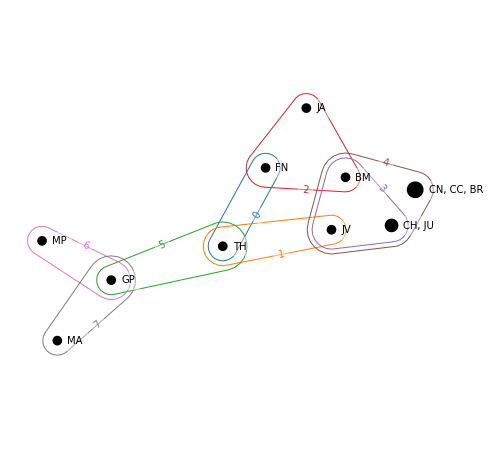

In [86]:
hnx.draw(H.collapse_nodes())